Tableau aléatoire:
[1.3001000024814856e-05, 4.54689999060065e-05, 9.248099995602388e-05, 0.000579992000166385, 0.0015258599998560385, 0.007379236899942044]
Tableau trié dans un ordre croissant:
[9.649999719840708e-06, 8.74779998412123e-05, 0.00034913100016638056, 0.008703088000129356, 0.03748186889997669, 0.9769526233999386]
Tableau trié dans un ordre décroissant:
[1.3402900094661163e-05, 8.856809999997494e-05, 0.00028579210011230315, 0.006028091600092012, 0.02718192479997015, 0.7015285002999917]
Tableau constant:
[9.649999719840708e-06, 8.74779998412123e-05, 0.00034913100016638056, 0.008703088000129356, 0.03748186889997669, 0.9769526233999386]
Tableau aléatoire (Quick sort):
[6.9722000262117945e-06, 3.335489973324002e-05, 1.9785000131378182e-05, 8.381319994441583e-05, 0.00019512599992594916, 0.0009810399999878427]


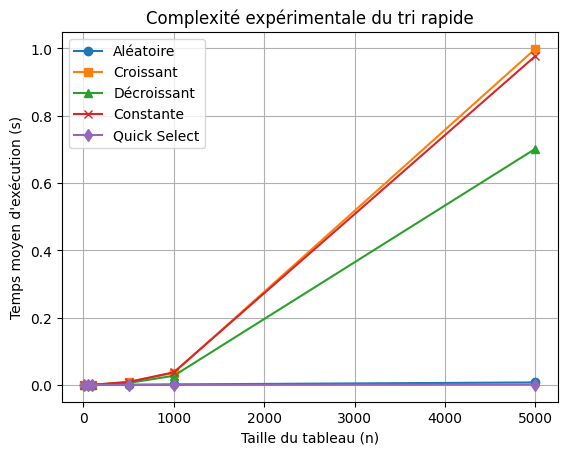

In [2]:
import random
import timeit
import sys
import matplotlib.pyplot as plt
sys.setrecursionlimit(10000)

def plot_times(sizes, temps_aleatoire, temps_croissant, temps_decroissant, temps_constant, temps_qs=None):
    plt.plot(sizes, temps_aleatoire, marker='o', label='Aléatoire')
    plt.plot(sizes, temps_croissant, marker='s', label='Croissant')
    plt.plot(sizes, temps_decroissant, marker='^', label='Décroissant')
    plt.plot(sizes, temps_constant, marker='x', label='Constante')
    if temps_qs is not None:
        plt.plot(sizes, temps_qs, marker='d', label='Quick Select')
    plt.xlabel("Taille du tableau (n)")
    plt.ylabel("Temps moyen d'exécution (s)")
    plt.title("Complexité expérimentale du tri rapide")
    plt.legend()
    plt.grid(True)
    plt.show()


def partition_lomuto(tableau, debut, fin):
    pivot = tableau[fin]
    indice_petit = debut - 1
    for j in range(debut, fin):
        if tableau[j] <= pivot:
            indice_petit += 1
            tableau[indice_petit], tableau[j] = tableau[j], tableau[indice_petit]
    tableau[indice_petit + 1], tableau[fin] = tableau[fin], tableau[indice_petit + 1]
    return indice_petit + 1


def partition_2(tableau, debut, fin):
    pivot = tableau[debut]
    gauche = debut - 1
    droite = fin + 1
    while True:
        while True:
            droite -= 1
            if tableau[droite] <= pivot:
                break
        while True:
            gauche += 1
            if tableau[gauche] >= pivot:
                break
        if gauche < droite:
            tableau[gauche], tableau[droite] = tableau[droite], tableau[gauche]
        else:
            return droite


def tri_rapide(tableau, debut=0, fin=None, methode="lomuto"):
    if fin is None:
        fin = len(tableau) - 1
    if debut < fin:
        if methode == "lomuto":
            position_pivot = partition_lomuto(tableau, debut, fin)
            tri_rapide(tableau, debut, position_pivot - 1, methode)
            tri_rapide(tableau, position_pivot + 1, fin, methode)
        else:
            position_pivot = partition_2(tableau, debut, fin)
            tri_rapide(tableau, debut, position_pivot, methode)
            tri_rapide(tableau, position_pivot + 1, fin, methode)
    return tableau

def rand_table(n):
    return [random.randint(0,10000000) for _ in range(n)]

def sort_rand_table(n , asc):
    t = [random.randint(0,10000000) for _ in range(n)]
    if asc == 1:
      t.sort()
    else:
      t.sort(reverse = True)
    return t


def avg_time(sizes):
    t = []
    for i in sizes:
        for _ in range(10):
            e = timeit.timeit(lambda: tri_rapide(rand_table(i), methode="lomuto"), number=1)
            t.append(e)
    s = []
    for i in range(0, len(t), 10):
        s.append(sum(t[i:i+10]) / 10)
    return s

def avg_time_cr(sizes ,asc):
  t = []
  for i in sizes:
      for _ in range(10):
          e = timeit.timeit(lambda: tri_rapide(sort_rand_table(i,asc), methode="lomuto"), number=1)
          t.append(e)
  s = []
  for i in range(0, len(t), 10):
    s.append(sum(t[i:i+10]) / 10)
  return s

def const_table(n):
    return [random.randint(0,10000000)] * n


def avg_time_const(sizes):
    t = []
    table = []
    for i in sizes:
        for _ in range(10):
            e = timeit.timeit(lambda: tri_rapide(const_table(i), methode="lomuto"), number=1)
            t.append(e)
    s = []
    for i in range(0, len(t), 10):
        s.append(sum(t[i:i+10]) / 10)
    return s

def quick_select(tableau, debut, fin, position):
    if debut == fin:
        return tableau[debut]
    pivot_index = partition_lomuto(tableau, debut, fin)
    if position == pivot_index:
        return tableau[pivot_index]
    elif position < pivot_index:
        return quick_select(tableau, debut, pivot_index - 1, position)
    else:
        return quick_select(tableau, pivot_index + 1, fin, position)

def avg_time_qs(sizes, ratio_position=0.5):
    t = []
    for i in sizes:
        for _ in range(10):
            tableau = [random.randint(0,10000000) for _ in range(i)]
            position = int(ratio_position * i)
            e = timeit.timeit(lambda: quick_select(tableau, 0, i-1, position), number=1)
            t.append(e)
    s = []
    for i in range(0, len(t), 10):
        s.append(sum(t[i:i+10]) / 10)
    return s


t = [10,50,100,500,1000,5000]
temps_aleatoire = avg_time(t)
temps_croissant = avg_time_cr(t, 1)
temps_decroissant = avg_time_cr(t, 0)
temps_constant = avg_time_const(t)
temps_qs = avg_time_qs(t)
print("Tableau aléatoire:")
print(temps_aleatoire)
print("Tableau trié dans un ordre croissant:")
print(temps_constant)
print("Tableau trié dans un ordre décroissant:")
print(temps_decroissant)
print("Tableau constant:")
print(temps_constant)
print("Tableau aléatoire (Quick sort):")
print(temps_qs)

plot_times(t, temps_aleatoire, temps_croissant, temps_decroissant, temps_constant, temps_qs)
